In [2]:
import os
import cv2
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict
from DataPreparation import *

data_dir = '../X-Ray/Chest-xray-landmark-dataset'
images_dir= os.path.join(data_dir, 'Images')
landmarks_dir = os.path.join(data_dir, 'landmarks')

file_name = os.listdir(images_dir)[0]
file_name = os.path.splitext(file_name)[0]


lands = extract_landmarks(file_name)

In [1]:
import os
import cv2
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict
from DataPreparation import *

# Paths
img_dir = 'Datasets/Chestxray/images'
output_dir = 'Datasets/Chestxray/Output_Skip'
img_name = 'CHNCXR_0062_0.png'

df, img = load_image_and_samples(img_dir, output_dir, img_name)
node_groups = df.groupby('Node')

In [55]:
# Find uncertainty when drawing from prior
img_dir = 'Datasets/Chestxray/Test'
output_dir_pior = 'Datasets/Chestxray/Test/PriorSamples'
img_name = 'sample.png'

df_prior, _ = load_image_and_samples(img_dir, output_dir_pior, img_name)
node_groups = df_prior.groupby('Node')
stds = node_groups[['X', 'Y']].std()
sigma = (stds['X'] + stds['Y']) / 2

print(f"Incerteza promedio sampleando de prior: {sigma.mean():.2f}")

Incerteza promedio sampleando de prior: 143.09


In [65]:
# Find uncertainty when drawing from images with no information
img_dir = 'Datasets/Chestxray/Test/images'
output_dir_pior = 'Datasets/Chestxray/Test/out'
imgs = os.listdir(img_dir)

for img_name in imgs:
    df_prior, img = load_image_and_samples(img_dir, output_dir_pior, img_name)
    node_groups = df_prior.groupby('Node')
    stds = node_groups[['X', 'Y']].std()
    sigma = (stds['X'] + stds['Y']) / 2
    print(f"Incerteza promedio para {img_name}: {sigma.mean():.2f}")

Incerteza promedio para random_uniform.png: 8.17
Incerteza promedio para random_gaussian.png: 7.69
Incerteza promedio para black_square.png: 119.99


In [2]:
def process_and_store_sigma(subdir, img_dir, output_dir):
    """Processes corrupted images and returns a sigma dictionary."""
    img_dir_path = os.path.join(img_dir, 'Corrupted', subdir)
    output_dir_path = os.path.join(output_dir, 'Corrupted', subdir)
    
    selected_images = {
        "_".join(file.split('_')[:-1]) + ".png"
        for file in os.listdir(img_dir_path)
    }
    
    return process_corr_images(img_dir_path, output_dir_path, selected_images)

## Uncertainty map

/media/ngaggion/DATA/HybridGNet-uncertainty/DataPreparation/plotting.py:156: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


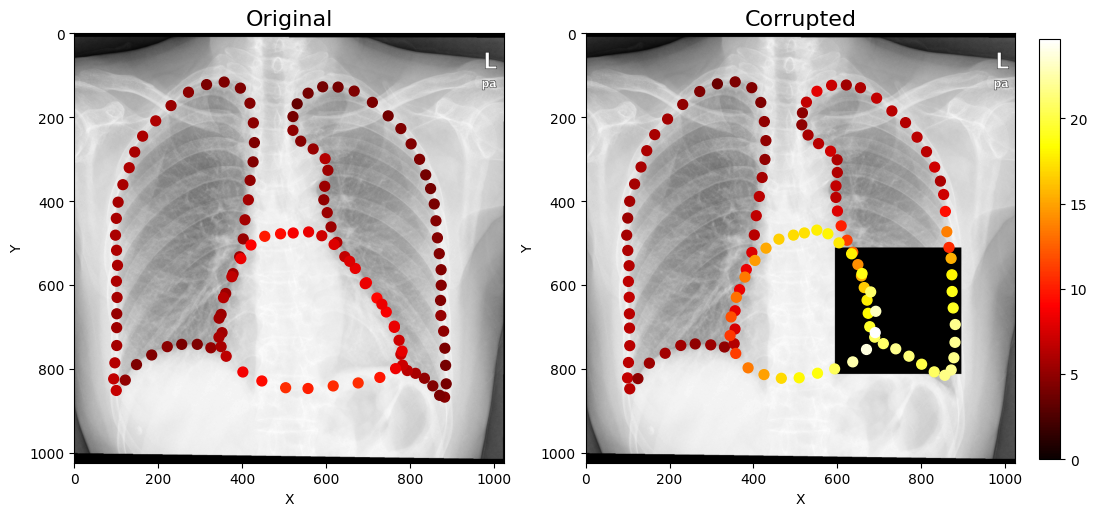

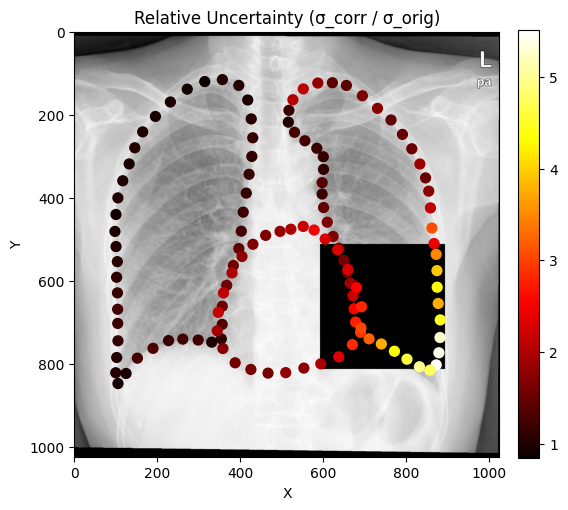

In [2]:
img_dir_corr = 'Outputs/Images/Corrupted/Occlusion/1'
img_dir = 'Outputs/Images/Clean'

img_name = 'CHNCXR_0096_0.png'

df_corr, img_corr = load_image_and_samples(img_name, img_dir_corr)
df_orig, img_orig = load_image_and_samples(img_name, img_dir)

vmax = compute_global_vmax(df_orig, df_corr)

fig, axes = plot_comparison(
    df_orig, img_orig, df_corr, img_corr,
    plot_fn=plot_mean_with_color_gradient,
    show_global_bar=True,
    vmax=vmax,
    show_bar=False
)

fig, ax, scatter = plot_relative_uncertainty(
    df_orig, df_corr, img_corr)

/media/ngaggion/DATA/HybridGNet-uncertainty/DataPreparation/plotting.py:156: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


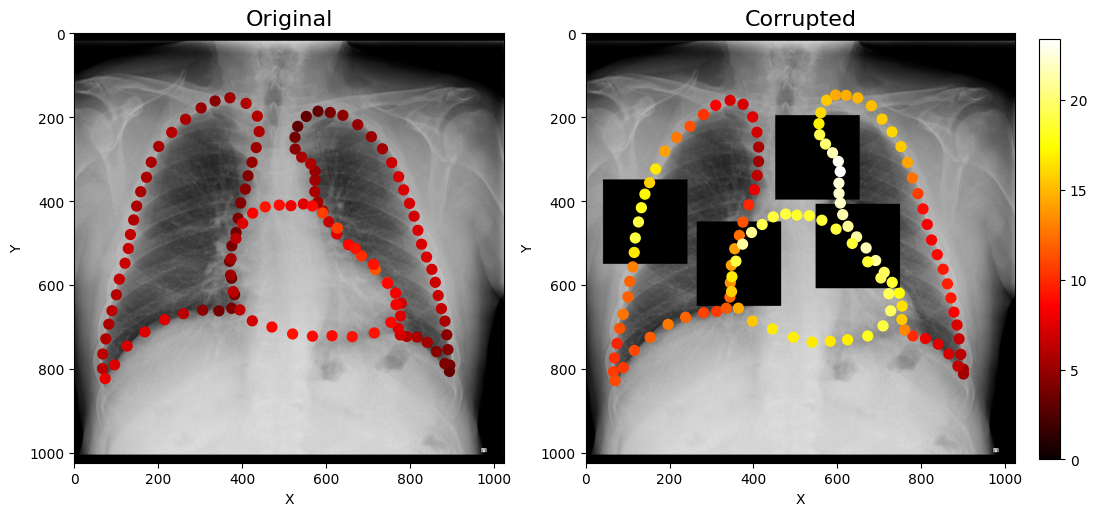

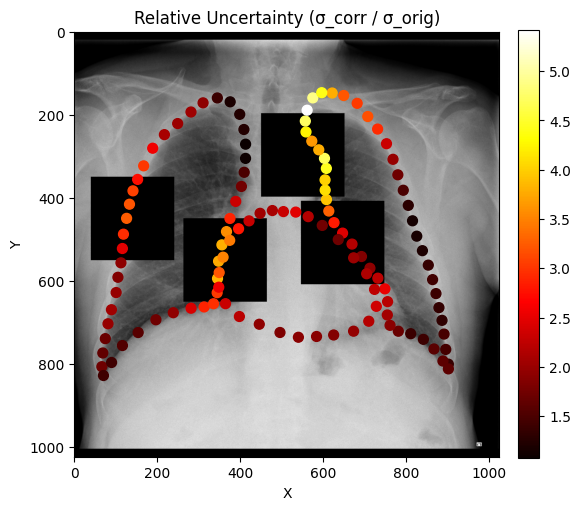

In [3]:
img_name = '199072368172967010909636348828886390156_co5vik.png'
img_dir_corr = 'Outputs/Images/Corrupted/Occlusion/4'

df_corr, img_corr = load_image_and_samples(img_name, img_dir_corr)
df_orig, img_orig = load_image_and_samples(img_name, img_dir)

fig, axes = plot_comparison(
    df_orig, img_orig, df_corr, img_corr,
    plot_fn=plot_mean_with_color_gradient,
    show_global_bar=True,
    vmax=compute_global_vmax(df_orig, df_corr),
    show_bar=False
)

fig, ax, scatter = plot_relative_uncertainty(
    df_orig, df_corr, img_corr)

/media/ngaggion/DATA/HybridGNet-uncertainty/DataPreparation/plotting.py:156: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


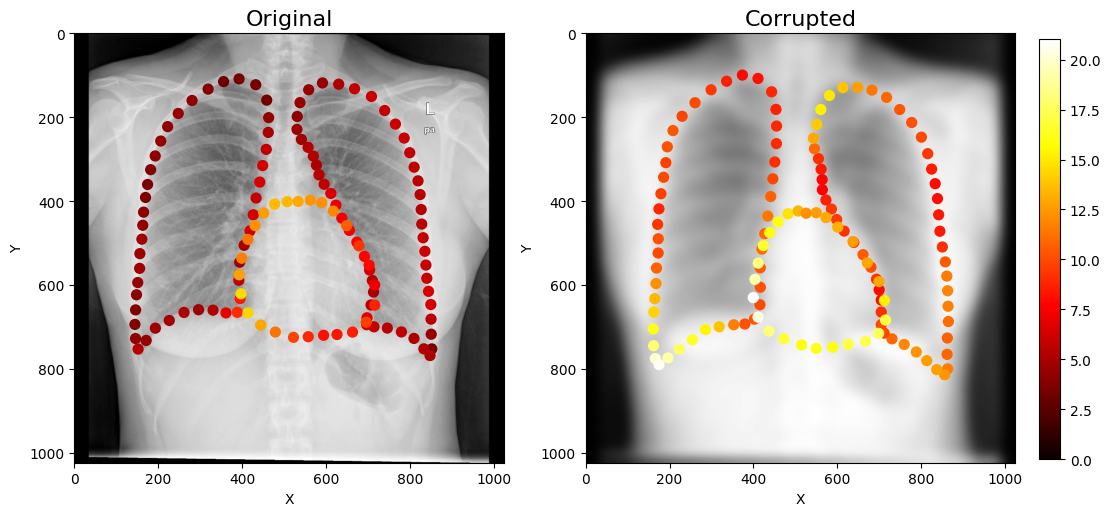

In [6]:
img_dir_corr = 'Outputs/Images/Corrupted/Blurring/gaussian/48'
img_name = 'CHNCXR_0084_0.png'

df_corr, img_corr = load_image_and_samples(img_name, img_dir_corr)
df_orig, img_orig = load_image_and_samples(img_name, img_dir)

fig, axes = plot_comparison(
    df_orig, img_orig, df_corr, img_corr,
    plot_fn=plot_mean_with_color_gradient,
    show_global_bar=True,
    vmax=compute_global_vmax(df_orig, df_corr),
    show_bar=False
)